# 1) Dynamic Programming

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

### 1) Discrete MDP implementation and guessed the optimal policy

In [2]:
from discrete_mdp import DiscreteMDP

See `discrete_mdp.py` for implementation

---

Here, in order to maximize reward, we would want to be stuck in the loop  $s_{2}\overset{a_{2}}{\longrightarrow}s_{2}$. To do so by taking a path maxmizing reward, we would pick policy $\pi^{*}=[a_{1}, a_{1}, a_{2}]$

__Problem modelisation__

Let $X$ our state space, $A$ the action space, $p(y\mid x, a)$ the transition probability and $r(x,a)$ the reward

> `states` and `actions` represent $X$ and $A$

> `transition` is a $|X|\times|A|\times|X|$ matrix given by $P_{x, a, y} = p(y\mid x, a)$

> `reward` is a $|X|\times|A|$ matrix given by $R_{x, a} = r(x, a)$

> `my_policy` is the guessed optimal policy

In [3]:
states = ['s0', 's1', 's2']
actions = ['a0', 'a1', 'a2']

transition = np.array([[[0.55, 0.45, 0.],[0.3, 0.7, 0.],[1., 0., 0.]],
                        [[0., 1., 0.],[0., 0.4, 0.6],[0., 1., 0.]],
                        [[0., 1., 0.],[0., 0.6, 0.4],[0., 0., 1.]]])

reward = np.array([[0., 0., 0.05], 
                   [0., 0., 0.], 
                   [0., 1., 0.9]])

my_policy = [1, 1, 2]

In [4]:
mdp = DiscreteMDP(states_names = states, 
                  action_names = actions, 
                  transition_proba = transition, 
                  reward = reward, 
                  optimal_policy=my_policy)

### 2) Value iteration

Until $\|V^{(k+1)}-V^{(k)}\|_{\infty} < \varepsilon$ do :

- $V^{(k+1)}\leftarrow \mathcal{T}V^{(k)} = \underset{a\in A}{\max}\left(R_{\cdot,a} + \gamma\sum_{y\in X}P_{\cdot,a,y}V^{(k)}_{y}\right)$

Take $\pi_{K} \in \underset{a\in A}{Argmax}\left(R_{\cdot,a} + \gamma\sum_{y\in X}P_{\cdot,a,y}V^{(K)}_{y}\right)$

---

Since $\varepsilon=0.01$ and $\gamma=0.95$, we would get an error lower than $\frac{2\varepsilon\gamma}{1-\gamma} = 0.38$

In [5]:
opt_policy_vi, distance, n_iter = mdp.run_value_iteration(eps=0.01, track=True)

In [6]:
print("Value iteration 0.01-optimal policy :", opt_policy_vi)

Value iteration 0.01-optimal policy : [1 1 2]


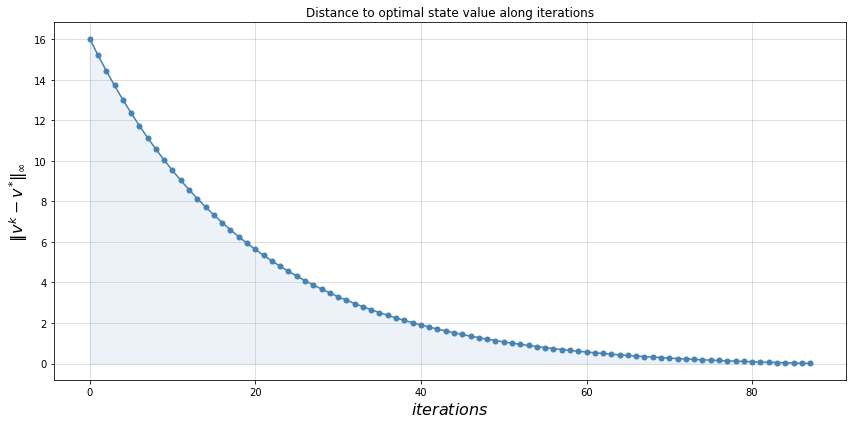

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(range(n_iter), distance, '-o', markersize=5, color="steelblue")
ax.fill_between(range(n_iter), distance, color="steelblue", alpha=0.1)
ax.set_xlabel(r"$iterations$", size=16)
ax.set_ylabel(r"$|\!|v^{k}-v^{*}\|\!|_{\infty}$", size=16)
ax.grid(alpha=0.5)
ax.set_title("Distance to optimal state value along iterations")
plt.tight_layout()

### 3) Policy iteration

Let $\pi$ a given policy, with the previous notations, let $P^{\pi}_{x,y} = P_{x,\pi(x),y}$ and $r^{\pi}_{x} = R_{x,\pi(x)}$

The policy iteration goess :

Until $V^{\pi_{k}}=V^{\pi_{k+1}}$ :

- $V^{\pi_{k}} \leftarrow (I-\gamma P^{\pi_{k}})^{-1}r^{\pi_{k}}$
- $\pi_{k+1} \leftarrow \underset{\pi\in A^{X}}{\text{Argmax}}\left[r^{\pi}+\gamma P^{\pi}V^{\pi_{k}}\right]$

Take final $\pi_{K}$ value

To make sure we run the __exact__ policy iteration, we set `eps=0` and `max_iter=np.inf`

In [8]:
initial_policy = [1,1,2]
opt_policy_pi = mdp.run_policy_iteration(initial_policy=initial_policy, eps=0., max_iter=np.inf)

/Users/dieze/Documents/MVA/RL/homeworks/reinforcement_learning/HWK1/1_Dynamic_Programming/discrete_mdp.py:90: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  reward = self.reward_[indexes]
/Users/dieze/Documents/MVA/RL/homeworks/reinforcement_learning/HWK1/1_Dynamic_Programming/discrete_mdp.py:91: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  transition_proba = self.transition_proba_[indexes]


In [9]:
print("Exact policy iteration optimal policy :", opt_policy_vi)

Exact policy iteration optimal policy : [1 1 2]


__Performances comparison__

To benchmark one method against the other, we set the same convergence criterion for both

- Value Iteration

In [15]:
mdp = DiscreteMDP(states_names = states, 
                  action_names = actions, 
                  transition_proba = transition, 
                  reward = reward, 
                  optimal_policy=my_policy)

In [16]:
%%time
mdp.run_value_iteration(eps=0.01)

CPU times: user 4.05 ms, sys: 850 µs, total: 4.9 ms
Wall time: 4.2 ms


array([1, 1, 2])

In [17]:
print("Number of iterations : ", mdp.iteration_)

Number of iterations :  88


- Policy Iteration

In [12]:
mdp = DiscreteMDP(states_names = states, 
                  action_names = actions, 
                  transition_proba = transition, 
                  reward = reward, 
                  optimal_policy=my_policy)

In [13]:
%%time
mdp.run_policy_iteration(eps=0.01)

CPU times: user 1.95 ms, sys: 952 µs, total: 2.9 ms
Wall time: 2.47 ms


/Users/dieze/Documents/MVA/RL/homeworks/reinforcement_learning/HWK1/1_Dynamic_Programming/discrete_mdp.py:90: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  reward = self.reward_[indexes]
/Users/dieze/Documents/MVA/RL/homeworks/reinforcement_learning/HWK1/1_Dynamic_Programming/discrete_mdp.py:91: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  transition_proba = self.transition_proba_[indexes]


array([1, 1, 2])

In [14]:
print("Number of iterations : ", mdp.iteration_)

Number of iterations :  4


- Conclusion :

Policy iterations globally runs faster but with an iteration average time of 0.617ms compared to 46,0$\mu$s for the value iteration. This is due the computational cost of the inversion for policy iteration that has a complexity of $\mathcal{O}(N^{3})$ with the Gauss-Jordan algorithm. 

Since the transition matrix is 3x3 matrix here, this is still suitable against the cons of the value iteration, namely its asymptotic convergence. Still, when working with larger state and action spaces, we might want to reconsider.